<a href="https://colab.research.google.com/github/lixx21/Classification/blob/main/Heart_Desease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Felix Pratamasan

Download file here:
[Heart Desease Data](https://drive.google.com/file/d/1gdGN52WobOxqybWxg9jYdyRWM52_Eyz6/view?usp=sharing)

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score as cvs
from sklearn.preprocessing import MinMaxScaler as mms
import sklearn.metrics  as met
from sklearn.linear_model import LogisticRegression as lr
import matplotlib.pyplot as plt

**Load Data**

In [36]:
#data frame

data = pd.read_csv("heart_desease_data.csv")
print("check missing (null) value : ")
print(data.isnull().sum()) #check if there is null value in dataset
print("")
print("count target : ")
print(data['target'].value_counts()) #count positive and negative target
print("")
data

check missing (null) value : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

count target : 
1    164
0    138
Name: target, dtype: int64



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Split Data**

In [85]:
#split data into X and y
#we just select 10 attributes that we think it is useful to our prediction and prevent overfitting with feature selection on last shell
X = data[['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data.iloc[:,-1]

print("Attributes")
print(X)
print("")
print("Target(label)")
print(y)

Attributes
     age  sex  cp  trestbps  thalach  exang  oldpeak  slope  ca  thal
0     63    1   3       145      150      0      2.3      0   0     1
1     37    1   2       130      187      0      3.5      0   0     2
2     41    0   1       130      172      0      1.4      2   0     2
3     56    1   1       120      178      0      0.8      2   0     2
4     57    0   0       120      163      1      0.6      2   0     2
..   ...  ...  ..       ...      ...    ...      ...    ...  ..   ...
297   57    0   0       140      123      1      0.2      1   0     3
298   45    1   3       110      132      0      1.2      1   0     3
299   68    1   0       144      141      0      3.4      1   2     3
300   57    1   0       130      115      1      1.2      1   1     3
301   57    0   1       130      174      0      0.0      1   1     2

[302 rows x 10 columns]

Target(label)
0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: targ

**Train Model**

In [86]:
#Normalization data and split into data train and data test
norm = mms().fit(X) #nomralization to change all the data in X in range value (0-1)
X = norm.transform(X)

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.4, random_state=1)

#Make a model

model = lr(solver='lbfgs')
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Model Evaluation**

In [87]:
#Make a predict accuracy
predict_train = model.predict(X_train)
print('predict accuracy train: ', acc(predict_train, y_train))

print("")
predict_test = model.predict(X_test)
print('predict accuracy test: ', acc(predict_test, y_test))

print("")
score = cvs(model,X_test, y_test, cv = 5)
print('cross validation score: ', score)

print("")
confusion = met.confusion_matrix(y_test, predict_test)
print("confusion metrix [true positive; false negative; false positive; true negative]: ")
print(confusion)

print("")
precision = met.precision_score(y_test, predict_test) #measure data that predict as true positive
print("precision score:", precision)

print("")
recall = met.recall_score(y_test, predict_test)#measure data that successfully predict as true positive
print("recall score:", recall)

predict accuracy train:  0.850828729281768

predict accuracy test:  0.8181818181818182

cross validation score:  [0.8        0.875      0.79166667 0.75       0.79166667]

confusion metrix [true positive; false negative; false positive; true negative]: 
[[45 11]
 [11 54]]

precision score: 0.8307692307692308

recall score: 0.8307692307692308


**ROC VISUALIZATION**

<function matplotlib.pyplot.show>

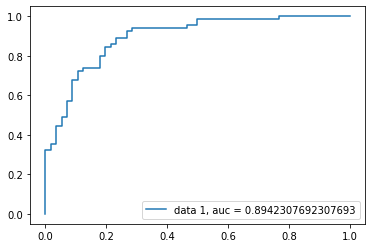

In [88]:
#Make ROC curve to visualize model

y_pred_proba = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba) #AUC(Area Under Curve)

plt.plot(fp,tp,label="data 1, auc = "+str(auc))
plt.legend(loc=4) #position of legend
plt.show


**Feature Selection**

In [84]:
#to select the most useful attributes
from sklearn.feature_selection import RFE as fs

rfe = fs(model, 10)
rfe = rfe.fit(X_train, y_train)

print("support: ", rfe.support_)
print("ranking: ", rfe.ranking_)

#false means that the atribute is not useful

support:  [ True  True  True  True False False False  True  True  True  True  True
  True]
ranking:  [1 1 1 1 3 4 2 1 1 1 1 1 1]
